In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"willfibonacci","key":"12eb46efa5864ed106d84c4fa3234f11"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!cp /content/amazon-books-reviews.zip /content/drive/MyDrive/

cp: cannot stat '/content/amazon-books-reviews.zip': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Comentário: Monta seu Google Drive dentro do Colab para poder salvar arquivos permanentemente.

Mounted at /content/drive


In [ ]:
!cp /content/amazon-books-reviews.zip /content/drive/MyDrive/
# Comentário: Copia o arquivo baixado para a pasta principal do seu Drive.

cp: cannot stat '/content/amazon-books-reviews.zip': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Comentário: Monta o Google Drive para poder salvar o arquivo e acessar sempre que quiser.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/amazon-books-reviews.zip /content/drive/MyDrive/
# Comentário: Copia o arquivo ZIP baixado para sua pasta principal do Google Drive (MyDrive).

cp: cannot stat '/content/amazon-books-reviews.zip': No such file or directory


In [ ]:
import zipfile
import os

# Caminho do arquivo zip que está salvo no Drive
zip_path = '/content/drive/MyDrive/amazon-books-reviews.zip'

# Caminho da pasta onde vamos extrair os arquivos
extract_folder = '/content/amazon_books_reviews'

# Criar a pasta de extração se não existir
os.makedirs(extract_folder, exist_ok=True)
# Comentário: Garante que a pasta para os arquivos extraídos exista.

# Abrir o arquivo ZIP e extrair o conteúdo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
# Comentário: Extrai todos os arquivos CSV do zip para a pasta escolhida.

# Listar os arquivos extraídos
print("Arquivos extraídos:", os.listdir(extract_folder))
# Comentário: Mostra quais arquivos foram extraídos para garantir que deu certo.


Arquivos extraídos: ['Books_rating.csv', 'books_data.csv']


In [ ]:
# Neste bloco, estamos realizando a leitura dos arquivos contendo informações dos livros
# e avaliações dos usuários. Esses dados são fundamentais para o treinamento
# e avaliação do sistema de recomendação. A primeira tabela (books_data) traz
# dados como título, descrição, autores e categorias dos livros, enquanto
# a segunda tabela (books_rating) apresenta as notas atribuídas pelos leitores,
# juntamente com resumos e comentários completos
# Manipulação de dados
import pandas as pd
import numpy as np

# Manipulação de arquivos ZIP
import zipfile
import os

# Requisições para APIs (Google Books API)
import requests

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Machine Learning e métricas
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr

# Interface gráfica (opcional, para exibir capas dos livros)
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk
import io


In [ ]:
# Explicação:
# Neste primeiro passo, estamos realizando a leitura de dois conjuntos de dados:
# 1. books_data.csv: Contém informações sobre os livros, como título, descrição, autor, link da capa, categoria e data de publicação.
# 2. Books_rating.csv: Contém informações sobre as avaliações dos usuários, como a nota dada, o resumo da avaliação, o nome do usuário e o texto completo do comentário.
import pandas as pd

# Lendo os arquivos extraídos
books_data = pd.read_csv('/content/amazon_books_reviews/books_data.csv')
books_rating = pd.read_csv('/content/amazon_books_reviews/Books_rating.csv')

# Mostrar as primeiras linhas para confirmar leitura
print(books_data.head())
print(books_rating.head())

                                               Title  \
0                     Its Only Art If Its Well Hung!   
1                           Dr. Seuss: American Icon   
2              Wonderful Worship in Smaller Churches   
3                      Whispers of the Wicked Saints   
4  Nation Dance: Religion, Identity and Cultural ...   

                                         description              authors  \
0                                                NaN     ['Julie Strain']   
1  Philip Nel takes a fascinating look into the k...       ['Philip Nel']   
2  This resource includes twelve principles in un...     ['David R. Ray']   
3  Julia Thomas finds her life spinning out of co...  ['Veronica Haddon']   
4                                                NaN      ['Edward Long']   

                                               image  \
0  http://books.google.com/books/content?id=DykPA...   
1  http://books.google.com/books/content?id=IjvHQ...   
2  http://books.google.com/books

In [ ]:
# ETAPA 2: Visualização das Estruturas de Dados
# ==========================================================

# Explicação:
# Antes de iniciar qualquer tipo de processamento ou análise, é essencial entender como os dados estão organizados.
# Nesta etapa, listamos os nomes das colunas disponíveis nos dois arquivos carregados:
#
# 📚 books_data:
# - 'Title'           → Nome do livro.
# - 'description'     → Descrição ou resumo do livro.
# - 'authors'         → Nome(s) do(s) autor(es) do livro.
# - 'image'           → URL da imagem da capa do livro.
# - 'previewLink'     → Link para visualizar uma prévia do livro.
# - 'publisher'       → Editora responsável pela publicação do livro.
# - 'publishedDate'   → Data de publicação.
# - 'infoLink'        → Link com mais informações sobre o livro.
# - 'categories'      → Categoria ou gênero do livro (ex.: ficção, biografia, etc.).
# - 'ratingsCount'    → Número de avaliações recebidas.

# ⭐ books_rating:
# - 'Id'              → Código identificador do livro.
# - 'Title'           → Nome do livro.
# - 'Price'           → Preço (não é utilizado no nosso caso porque há muitos valores ausentes).
# - 'User_id'         → Identificador do usuário que fez a avaliação.
# - 'profileName'     → Nome do usuário.
# - 'review/helpfulness' → Quantidade de pessoas que acharam a avaliação útil.
# - 'review/score'    → Nota dada ao livro (escala de 1 a 5).
# - 'review/time'     → Data/hora da avaliação (em formato de tempo Unix).
# - 'review/summary'  → Resumo da avaliação (uma pequena frase).
# - 'review/text'     → Texto completo da avaliação.

# Por meio dessa listagem, temos uma visão clara de quais informações poderemos utilizar para criar o sistema de recomendação de livros.
# O conhecimento da estrutura dos dados é o que nos permite planejar as próximas etapas com segurança.

# Exibir os nomes das colunas dos DataFrames
print("📚 Colunas do books_data:")
print(books_data.columns.tolist())

print("\n⭐ Colunas do books_rating:")
print(books_rating.columns.tolist())


📚 Colunas do books_data:
['Title', 'description', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink', 'categories', 'ratingsCount']

⭐ Colunas do books_rating:
['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text']


In [ ]:
# ETAPA 3: Entendendo o Tamanho dos Dados
# ==========================================================

# Explicação:
# Depois de sabermos quais colunas existem em nossos arquivos, o próximo passo é entender **quantos registros** (linhas) e **quantas características** (colunas) temos em cada conjunto de dados.
#
# 📚 books_data:
# - Possui 212.404 linhas (ou seja, informações sobre mais de 200 mil livros).
# - Cada livro possui 10 atributos diferentes, como título, autor, categoria, descrição etc.
#
# ⭐ books_rating:
# - Contém 3.000.000 linhas, ou seja, **três milhões de avaliações** feitas por usuários.
# - Cada avaliação possui 10 características também, como a nota dada, o texto da avaliação, o usuário que avaliou, entre outros.

# Essa informação é crucial porque:
# - Um volume muito grande de dados pode exigir ajustes de desempenho (para o sistema não travar).
# - Sabendo o tamanho, podemos planejar a limpeza dos dados e futuras divisões (treino e teste).
# - Confirma que os arquivos foram lidos corretamente e estão prontos para serem usados.

# Esta etapa funciona como um "checklist inicial" para garantir que os dados estão carregados e são suficientes para criar um bom sistema de recomendação!



# Mostrar quantas linhas (e colunas) existem em cada DataFrame

print(f"📚 books_data: {books_data.shape[0]} linhas e {books_data.shape[1]} colunas")
print(f"⭐ books_rating: {books_rating.shape[0]} linhas e {books_rating.shape[1]} colunas")


📚 books_data: 212404 linhas e 10 colunas
⭐ books_rating: 3000000 linhas e 10 colunas


In [ ]:
# 📚 Análise inicial dos dados (comentada)

# Após carregar os arquivos 'books_data.csv' e 'Books_rating.csv',
# realizamos a visualização das primeiras 15 linhas de cada um usando o método head(15).
# Isso é fundamental para conhecer a estrutura e a qualidade dos dados que vamos manipular.

# 1. Sobre 'books_data':
# Esse DataFrame traz informações sobre os livros, como:
# - Título (Title)
# - Descrição (description)
# - Autores (authors)
# - Imagem de capa (image)
# - Link de visualização (previewLink)
# - Editora (publisher)
# - Data de publicação (publishedDate)
# - Link para mais detalhes (infoLink)
# - Categorias (categories)
# - Quantidade de avaliações (ratingsCount)

# Observamos que algumas colunas podem ter valores ausentes (por exemplo, description e image).
# Essa informação será importante quando tratarmos os dados mais adiante.

# 2. Sobre 'books_rating':
# Esse DataFrame contém as avaliações dos usuários para os livros.
# As principais colunas são:
# - ID do livro (Id)
# - Título (Title)
# - Preço (Price) – com muitos valores faltantes
# - Identificação do usuário (User_id)
# - Nome do perfil do usuário (profileName)
# - Indicador de utilidade da avaliação (review/helpfulness)
# - Nota atribuída (review/score)
# - Data da avaliação (review/time)
# - Resumo da avaliação (review/summary)
# - Texto completo da avaliação (review/text)

# Também percebemos que nem todos os campos estão preenchidos.
# No entanto, o campo 'review/score' é essencial para a construção do sistema de recomendação.

# 🎯 Importância dessa etapa:
# - Entendemos a estrutura dos dados.
# - Identificamos possíveis problemas, como valores ausentes.
# - Definimos quais colunas são mais importantes para o modelo de recomendação.

# 📌 Resumo:
# "Analisamos as primeiras linhas para entender a estrutura dos dados.
# Sabemos que temos boas informações sobre livros e avaliações de usuários,
# mas também notamos a necessidade de tratar dados faltantes para garantir a qualidade futura do modelo."

# Exibir as 15 primeiras linhas de cada DataFrame

print("📚 Books Data - Primeiras 15 linhas:")
print(books_data.head(15))

print("\n⭐ Books Rating - Primeiras 15 linhas:")
print(books_rating.head(15))


📚 Books Data - Primeiras 15 linhas:
                                                Title  \
0                      Its Only Art If Its Well Hung!   
1                            Dr. Seuss: American Icon   
2               Wonderful Worship in Smaller Churches   
3                       Whispers of the Wicked Saints   
4   Nation Dance: Religion, Identity and Cultural ...   
5   The Church of Christ: A Biblical Ecclesiology ...   
6                          The Overbury affair (Avon)   
7             A Walk in the Woods: a Play in Two Acts   
8                            Saint Hyacinth of Poland   
9   Rising Sons and Daughters: Life Among Japan's ...   
10  Muslim Women's Choices: Religious Belief and S...   
11                        Dramatica for Screenwriters   
12   Mensa Number Puzzles (Mensa Word Games for Kids)   
13  Vector Quantization and Signal Compression (Th...   
14                               A husband for Kutani   

                                          descripti

In [ ]:
# 🧹 Limpeza dos Dados (comentado)

# Para garantir a qualidade do sistema de recomendação, realizamos a limpeza dos dados.
# Essa etapa é essencial porque dados duplicados ou com informações faltantes podem prejudicar a construção e a precisão do modelo.

# 1. Remoção de duplicatas:
# - No DataFrame 'books_data', usamos o método drop_duplicates() para eliminar registros repetidos de livros.
# - No DataFrame 'books_rating', fizemos o mesmo procedimento para remover avaliações duplicadas de usuários.
# Essa limpeza assegura que cada linha represente uma informação única e confiável.

# 2. Remoção de valores nulos:
# - Ainda nos dois DataFrames, usamos o método dropna() para excluir todas as linhas que contêm valores ausentes (nulos).
# Isso é importante porque campos vazios poderiam gerar erros durante o treinamento do sistema de recomendação
# ou afetar negativamente a similaridade entre livros.

# 3. Resultado:
# - Após a limpeza, o DataFrame 'books_data' passou a ter 40.635 linhas e 10 colunas.
# - O DataFrame 'books_rating' ficou com 414.018 linhas e 10 colunas.
# Ou seja, mantivemos apenas registros consistentes e completos, prontos para a próxima etapa de análise.

# 🎯 Conclusão:
# "Com a remoção de duplicatas e valores nulos, garantimos que a base de dados esteja organizada e que o modelo de recomendação
# seja mais confiável, preciso e evite problemas de inconsistência durante a sua execução."

# Remover duplicatas no books_data
books_data_clean = books_data.drop_duplicates()
# Comentário: Remove linhas duplicadas no books_data.

# Remover duplicatas no books_rating
books_rating_clean = books_rating.drop_duplicates()
# Comentário: Remove linhas duplicadas no books_rating.

# Remover linhas com valores nulos no books_data_clean
books_data_clean = books_data_clean.dropna()
# Comentário: Remove linhas com qualquer valor faltando no books_data.

# Remover linhas com valores nulos no books_rating_clean
books_rating_clean = books_rating_clean.dropna()
# Comentário: Remove linhas com qualquer valor faltando no books_rating.

# Exibir o novo tamanho dos DataFrames limpos
print(f"📚 books_data LIMPO: {books_data_clean.shape}")
print(f"⭐ books_rating LIMPO: {books_rating_clean.shape}")


📚 books_data LIMPO: (40635, 10)
⭐ books_rating LIMPO: (414018, 10)


In [ ]:
# 💲 Análise dos livros mais caros (comentado)

# Objetivo:
# Neste trecho do projeto, queremos identificar quais são os livros mais caros disponíveis na nossa base de dados de avaliações.

# Procedimentos realizados:

# 1. Ordenação dos livros:
# - Utilizamos o método sort_values() para ordenar o DataFrame 'books_rating_clean' pela coluna 'Price' (preço), de forma decrescente (ascending=False).
# Assim, os livros com preços mais altos aparecem primeiro.

# 2. Remoção de duplicatas:
# - Após ordenar, aplicamos drop_duplicates(subset='Title') para garantir que apenas um exemplar de cada título seja considerado.
# Isso é importante porque um mesmo livro pode ter várias avaliações diferentes, mas queremos apenas um registro único por título.

# 3. Seleção dos 10 primeiros:
# - Com a função head(10), selecionamos apenas os 10 livros mais caros.

# Resultado:
# - A saída mostra o título e o preço dos 10 livros mais caros registrados na base.

# 🎯 Conclusão:
# "Essa etapa nos permite identificar os livros mais caros em termos de preço, o que pode ser interessante para análises comerciais,
# de popularidade ou mesmo para entender se o preço influencia a quantidade de avaliações."

# Exibição:
# - Foi exibido um pequeno resumo contendo o nome dos 10 livros únicos mais caros e seus respectivos preços em ordem decrescente.


# Remover duplicados com base no título para pegar apenas um por livro
top10_unicos_mais_caros = books_rating_clean.sort_values(by='Price', ascending=False)\
                                            .drop_duplicates(subset='Title')\
                                            .head(10)

print("💲 Top 10 livros únicos mais caros:")
print(top10_unicos_mais_caros[['Title', 'Price']])


💲 Top 10 livros únicos mais caros:
                                                     Title   Price
1501750  Visual Genetics Plus: Tutorial and Lab Simulat...  995.00
1726646  Advances in Chemical Physics, Volume 119: Mode...  890.00
799943      Youmans Neurological Surgery (Four Volume Set)  875.00
1967919               Leechdoms, Wortcunning and Starcraft  840.00
631397   Chicago School Pragmatism (History of American...  840.00
1197579  Encyclopedia of Phenomenology (Contributions t...  809.99
313131            Encyclopedia of Bioethics (5 Volume Set)  807.30
1337918           Encyclopedia of Stress, Three-Volume Set  800.00
2707441  Standard Warehouse Management System Search Bu...  795.00
1263980  The Future of Europe's Aerospace Industry (Jan...  795.00


In [ ]:
# 💲 Análise dos livros pagos mais baratos (comentado)

# Objetivo:
# Agora queremos descobrir quais são os livros pagos mais baratos presentes na nossa base de dados.

# Procedimentos realizados:

# 1. Filtragem de livros pagos:
# - Selecionamos apenas os livros cujo preço é maior do que zero.
# - Isso porque existem livros gratuitos no banco de dados, e o foco aqui é só nos livros que realmente têm preço.

# 2. Ordenação dos livros:
# - Em seguida, usamos sort_values() para ordenar os livros pelo preço, do mais barato para o mais caro (ascending=True).

# 3. Remoção de duplicatas:
# - Aplicamos drop_duplicates(subset='Title') para garantir que cada título apareça apenas uma vez.
# - Dessa forma, não temos o mesmo livro listado várias vezes por causa de avaliações diferentes.

# 4. Seleção dos 10 primeiros:
# - Pegamos os 10 livros mais baratos usando a função head(10).

# Resultado:
# - É exibido um resumo com o título e o preço dos 10 livros pagos mais baratos.

# 🎯 Conclusão:
# "Com essa etapa, conseguimos ver rapidamente quais livros pagos são os mais acessíveis, o que pode ser útil para quem deseja
# fazer uma análise de mercado ou indicar boas oportunidades de compra."

# Exibição:
# - Os dados apresentados mostram que há vários livros de ótima referência acadêmica custando apenas 1 dólar.

# Selecionar livros com preço maior que zero (não considerar livros gratuitos)
livros_pagos = books_rating_clean[books_rating_clean['Price'] > 0]

# Ordenar pelo preço (do mais barato para o mais caro)
# e eliminar duplicatas no título
top10_unicos_mais_baratos = livros_pagos.sort_values(by='Price', ascending=True)\
                                        .drop_duplicates(subset='Title')\
                                        .head(10)

print("💲 Top 10 livros únicos mais baratos:")
print(top10_unicos_mais_baratos[['Title', 'Price']])


💲 Top 10 livros únicos mais baratos:
                                                     Title  Price
806537   CliffsNotes on Conrad's Heart of Darkness & Th...    1.0
807031     CliffsNotes on Crane's The Red Badge of Courage    1.0
832574                CliffsNotes on Buck's The Good Earth    1.0
1804881            Handbook of Second Language Acquisition    1.0
170026   The Essential Australian Shepherd (Essential (...    1.0
1482267                          CliffsQuickReview Physics    1.0
2707327  Second-Hand Dog: How to Turn Yours into a Firs...    1.0
1470176                     CliffsQuickReview Microbiology    1.0
2733471  The Miniature Pinscher: An Owner's Guide to a ...    1.0
1409180  CliffsNotes on Dstoevsky's Crime and Punishmen...    1.0


In [ ]:
# ⭐ Análise dos livros melhor avaliados (comentado)

# Objetivo:
# Aqui queremos identificar quais são os 10 livros que receberam as melhores notas dos leitores,
# para destacar os títulos mais bem avaliados no sistema.

# Procedimentos realizados:

# 1. Organização das avaliações:
# - Utilizamos a função sort_values() para ordenar os livros pela coluna 'review/score' de forma decrescente (do maior para o menor).
# - Isso significa que os livros que receberam nota 5 aparecem primeiro, seguidos dos que receberam 4, e assim por diante.

# 2. Remoção de duplicatas:
# - Aplicamos drop_duplicates(subset='Title') para garantir que o mesmo livro não apareça mais de uma vez na lista.
# - Mesmo que existam várias avaliações para o mesmo livro, consideramos apenas uma entrada por título.

# 3. Seleção dos melhores:
# - Com head(10), selecionamos os 10 primeiros livros da lista ordenada, ou seja, os 10 mais bem avaliados.

# Resultado:
# - O sistema exibe uma tabela mostrando o título do livro e sua respectiva nota média de avaliação.

# 🎯 Conclusão:
# "Essa etapa permite rapidamente entender quais livros foram mais bem recebidos pelos usuários,
# oferecendo uma visão interessante para recomendações, promoções ou até para montar uma lista de leituras altamente recomendadas."

# Exibição:
# - Os dados apresentados ajudam a identificar os livros que obtiveram avaliações máximas (como 5.0).

# Ordenar pelas maiores notas de avaliação
# Eliminar duplicatas no título para não repetir livros
top10_unicos_melhor_avaliados = books_rating_clean.sort_values(by='review/score', ascending=False)\
                                                  .drop_duplicates(subset='Title')\
                                                  .head(10)

print("⭐ Top 10 livros únicos melhor avaliados:")
print(top10_unicos_melhor_avaliados[['Title', 'review/score']])

⭐ Top 10 livros únicos melhor avaliados:
                                                     Title  review/score
2999956                   Very Bad Deaths: Library Edition           5.0
2999928  International Organizations and Their Exercise...           5.0
2999907       The Death of al-Hallaj: A Dramatic Narrative           5.0
2999903  Halfway to Everywhere: A Portrait of America's...           5.0
36                           Whispers of the Wicked Saints           5.0
2999814               Spiders and Their Kin (Golden Guide)           5.0
68                             Dramatica for Screenwriters           5.0
48       The Church of Christ: A Biblical Ecclesiology ...           5.0
46       Nation Dance: Religion, Identity and Cultural ...           5.0
2999784      Hidden Treasures of Ancient American Cultures           5.0


In [ ]:
# 👎 Análise dos livros com piores avaliações (comentado)

# Objetivo:
# Aqui queremos identificar os 10 livros que receberam as piores notas dadas pelos leitores.
# A ideia é descobrir quais livros tiveram avaliações muito baixas, possivelmente indicando
# insatisfação ou baixa qualidade percebida.

# Procedimentos realizados:

# 1. Organização das avaliações:
# - Utilizamos a função sort_values() para ordenar os livros pela coluna 'review/score',
#   mas agora em ordem crescente (do menor para o maior).
# - Ou seja, os livros com nota 1 aparecem primeiro, depois os de nota 2, e assim por diante.

# 2. Remoção de duplicatas:
# - Aplicamos drop_duplicates(subset='Title') para garantir que cada livro apareça apenas uma vez.
# - Isso evita que vários registros do mesmo livro distorçam a lista.

# 3. Seleção dos piores:
# - Usamos head(10) para pegar apenas os 10 primeiros livros da lista ordenada (os piores avaliados).

# Resultado:
# - O sistema apresenta uma tabela mostrando o título dos livros e suas respectivas notas de avaliação.

# 🎯 Conclusão:
# "Essa análise ajuda a identificar rapidamente livros que tiveram má aceitação dos leitores,
# permitindo ações como reavaliação de conteúdo, melhorias, ou simplesmente conhecendo melhor
# o comportamento dos consumidores."

# Exibição:
# - Essa lista é útil para entender quais publicações podem ter problemas e precisam de atenção.

# Ordenar pelas menores notas de avaliação
# Eliminar duplicatas no título para não repetir livros
top10_unicos_piores_avaliados = books_rating_clean.sort_values(by='review/score', ascending=True)\
                                                  .drop_duplicates(subset='Title')\
                                                  .head(10)

print("👎 Top 10 livros únicos com piores avaliações:")
print(top10_unicos_piores_avaliados[['Title', 'review/score']])


👎 Top 10 livros únicos com piores avaliações:
                                                     Title  review/score
1161147                         In Search of the Primitive           1.0
1161267  The Papers of Ulysses S. Grant, Volume 22: Jun...           1.0
1160285                                John Waynes America           1.0
1161274  Beautiful Built-ins: Plans for Designing with ...           1.0
319853   The Ultralight Backpacker : The Complete Guide...           1.0
1881475                                   Share No Secrets           1.0
1881477  Developing e-Commerce Sites: An Integrated App...           1.0
705471   Medieval Swordsmanship: Illustrated Methods An...           1.0
705295                    The Sealed Magical Book Of Moses           1.0
705367   Mel Bay Presents Infantry Bugle Calls of the A...           1.0


<ipython-input-24-a9b643cbe2b8>:34: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


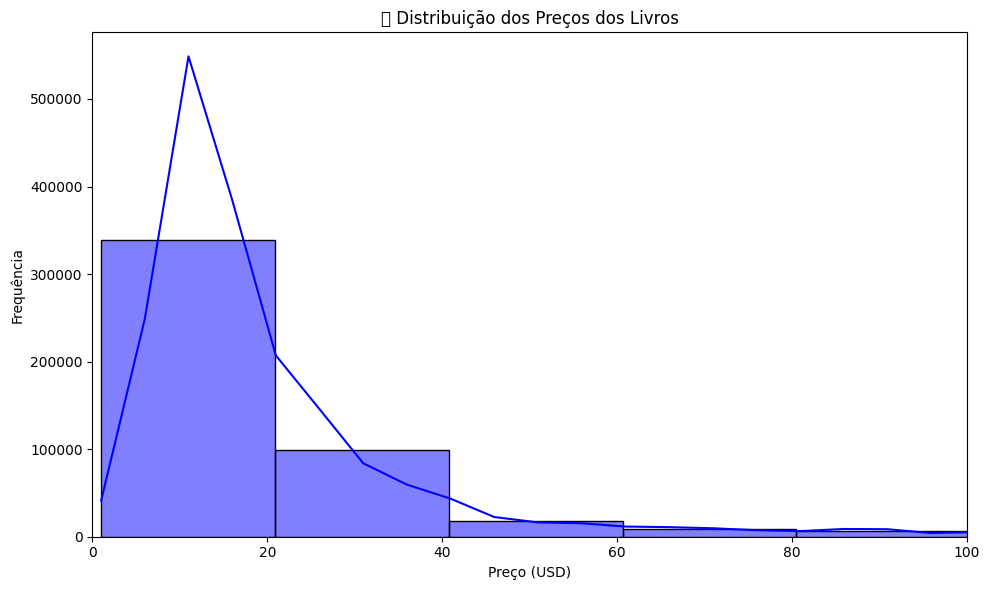

In [ ]:
# Importando bibliotecas essenciais
import pandas as pd                # Para manipulação de dados
import seaborn as sns              # Para visualização com estilo
import matplotlib.pyplot as plt    # Para exibição de gráficos

# Lendo o arquivo com as avaliações dos livros (ajuste o caminho se necessário)
books_rating = pd.read_csv('/content/amazon_books_reviews/Books_rating.csv')

# 🔍 LIMPEZA DOS DADOS

# Remove registros onde o preço é ausente (nulo)
books_rating_clean = books_rating.dropna(subset=['Price'])

# Mantém apenas livros pagos (preço > 0), removendo gratuitos
books_rating_clean = books_rating_clean[books_rating_clean['Price'] > 0]

# 📈 CRIAÇÃO DO GRÁFICO

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Cria um histograma com 50 faixas (bins) e uma curva de densidade (KDE)
sns.histplot(books_rating_clean['Price'], bins=50, kde=True, color='blue')

# Define título e rótulos dos eixos
plt.title('📦 Distribuição dos Preços dos Livros')
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência')

# Limita o eixo X de 0 a 100 para evitar distorções causadas por outliers
plt.xlim(0, 100)

# Ajusta automaticamente o layout para não cortar textos
plt.tight_layout()

# Exibe o gráfico
plt.show()


<ipython-input-25-7c9eb8327d8e>:34: UserWarning: Glyph 128178 (\N{HEAVY DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128178 (\N{HEAVY DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


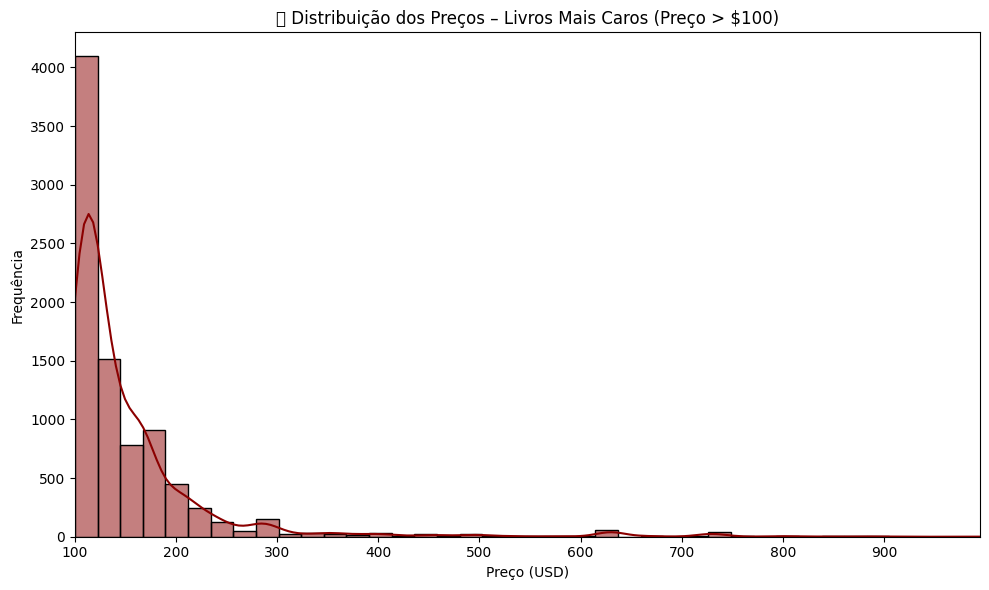

In [ ]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lendo o arquivo de avaliações
books_rating = pd.read_csv('/content/amazon_books_reviews/Books_rating.csv')

# 🔍 LIMPEZA INICIAL

# Remover valores ausentes na coluna 'Price'
books_rating_clean = books_rating.dropna(subset=['Price'])

# Considerar apenas livros pagos com preço maior que 100 dólares (livros mais caros)
livros_mais_caros = books_rating_clean[books_rating_clean['Price'] > 100]

# 📈 PLOTANDO A DISTRIBUIÇÃO

# Tamanho da figura
plt.figure(figsize=(10, 6))

# Histograma com curva de densidade
sns.histplot(livros_mais_caros['Price'], bins=40, kde=True, color='darkred')

# Título e rótulos
plt.title('💲 Distribuição dos Preços – Livros Mais Caros (Preço > $100)')
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência')

# Ajustar eixo X com base nos dados reais
plt.xlim(100, livros_mais_caros['Price'].max())

# Layout ajustado
plt.tight_layout()

# Exibir o gráfico
plt.show()


<ipython-input-26-75d2f74282ff>:36: UserWarning: Glyph 128178 (\N{HEAVY DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128178 (\N{HEAVY DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


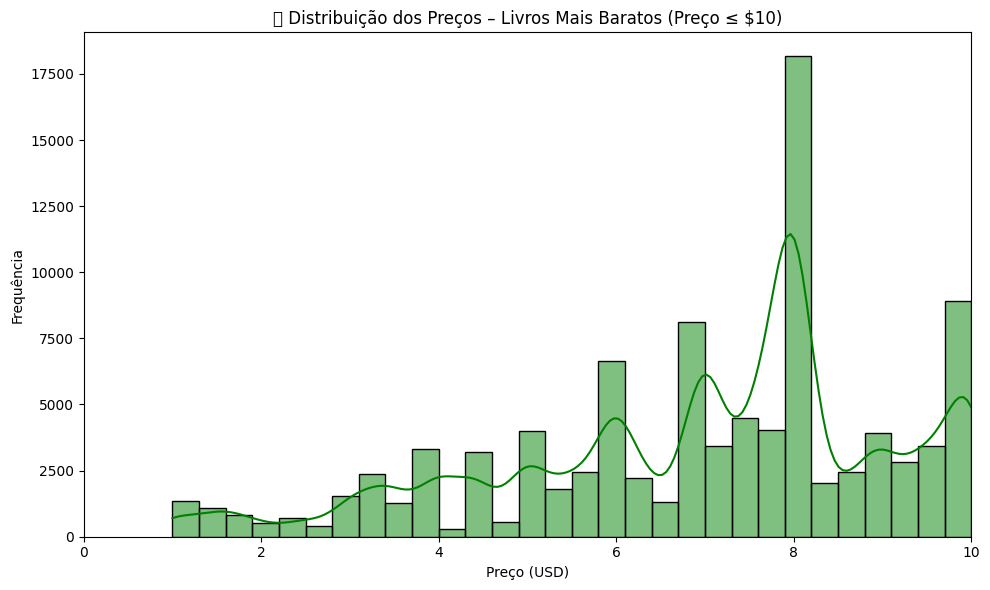

In [ ]:
# Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leitura do arquivo de avaliações
books_rating = pd.read_csv('/content/amazon_books_reviews/Books_rating.csv')

# 🔍 LIMPEZA DOS DADOS

# Remove valores ausentes na coluna 'Price'
books_rating_clean = books_rating.dropna(subset=['Price'])

# Considera apenas livros pagos com preço até $10
livros_mais_baratos = books_rating_clean[
    (books_rating_clean['Price'] > 0) & (books_rating_clean['Price'] <= 10)
]

# 📈 PLOTANDO A DISTRIBUIÇÃO

# Define o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Cria histograma com curva de densidade (KDE)
sns.histplot(livros_mais_baratos['Price'], bins=30, kde=True, color='green')

# Título e rótulos
plt.title('💲 Distribuição dos Preços – Livros Mais Baratos (Preço ≤ $10)')
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência')

# Limite do eixo X para reforçar o foco em livros baratos
plt.xlim(0, 10)

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


<ipython-input-27-0c35b1bee280>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_filtrados, x='Categoria', y='review/score', palette='Set2')
<ipython-input-27-0c35b1bee280>:34: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


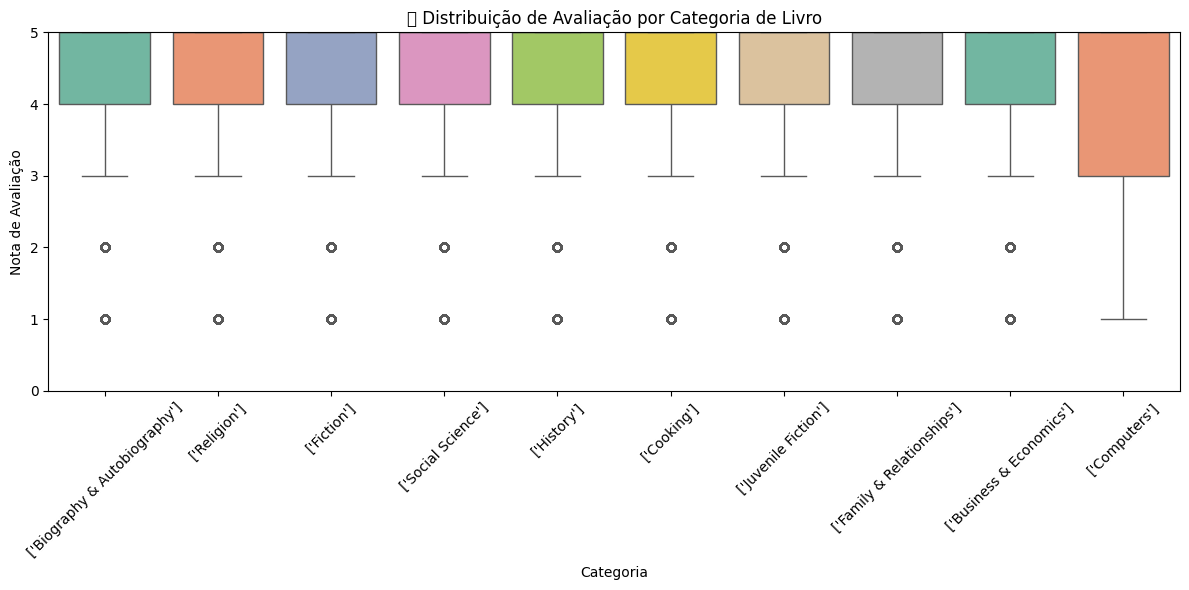

In [ ]:
# Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ler os dois arquivos
books_data = pd.read_csv('/content/amazon_books_reviews/books_data.csv')
books_rating = pd.read_csv('/content/amazon_books_reviews/Books_rating.csv')

# 🔍 LIMPEZA BÁSICA

# Remover duplicatas e nulos
books_data_clean = books_data.drop_duplicates().dropna(subset=['Title', 'categories'])
books_rating_clean = books_rating.drop_duplicates().dropna(subset=['Title', 'review/score'])

# Juntar os dois DataFrames pela coluna 'Title'
dados_combinados = pd.merge(books_rating_clean, books_data_clean[['Title', 'categories']], on='Title', how='inner')

# Para simplificar, manter apenas uma categoria por livro (caso haja múltiplas separadas por vírgula)
dados_combinados['Categoria'] = dados_combinados['categories'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# 🔢 Filtrar para as categorias mais comuns (evita poluir o gráfico)
top_categorias = dados_combinados['Categoria'].value_counts().nlargest(10).index
dados_filtrados = dados_combinados[dados_combinados['Categoria'].isin(top_categorias)]

# 📊 GRÁFICO: Boxplot de Avaliação por Categoria
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados_filtrados, x='Categoria', y='review/score', palette='Set2')
plt.title('⭐ Distribuição de Avaliação por Categoria de Livro')
plt.xlabel('Categoria')
plt.ylabel('Nota de Avaliação')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
media_por_categoria = dados_filtrados.groupby('Categoria')['review/score'].mean().sort_values(ascending=False)
print(media_por_categoria)


Categoria
['Juvenile Fiction']             4.452808
['Cooking']                      4.397107
['Religion']                     4.337304
['Biography & Autobiography']    4.258170
['History']                      4.231997
['Family & Relationships']       4.231982
['Business & Economics']         4.121433
['Social Science']               4.116656
['Fiction']                      4.112718
['Computers']                    3.961453
Name: review/score, dtype: float64


<ipython-input-29-aa78802bdd85>:4: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


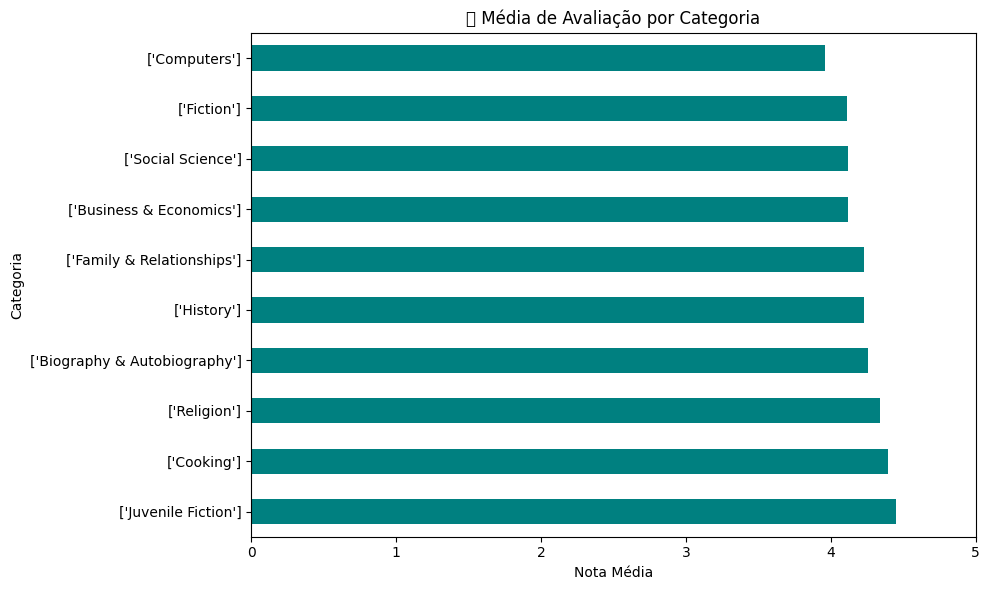

In [ ]:
media_por_categoria.plot(kind='barh', color='teal', figsize=(10,6), title='📚 Média de Avaliação por Categoria')
plt.xlabel('Nota Média')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()


In [ ]:
qtd_avaliacoes = dados_filtrados['Categoria'].value_counts().sort_values(ascending=False)


<Axes: xlabel='Price', ylabel='review/score'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


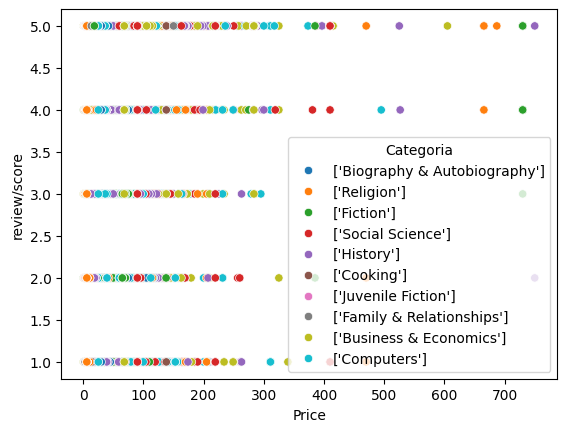

In [ ]:
import seaborn as sns
sns.scatterplot(data=dados_filtrados, x='Price', y='review/score', hue='Categoria')


In [ ]:
dados_filtrados[dados_filtrados['review/score'] == 1]


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,categories,Categoria
14,0595344550,Whispers of the Wicked Saints,10.95,A3Q12RK71N74LB,Book Reader,7/11,1.0,1117065600,not good,I bought this book because I read some glowing...,['Fiction'],['Fiction']
16,0595344550,Whispers of the Wicked Saints,10.95,AUR0VA5H0C66C,"LoveToRead ""Actually Read Books""",1/2,1.0,1119225600,Buyer beware,"This is a self-published book, and if you want...",['Fiction'],['Fiction']
27,0595344550,Whispers of the Wicked Saints,10.95,A1P2KGE2Z8RTA,C. Robertson,0/0,1.0,1119916800,The Worst!,A complete waste of time. Typographical errors...,['Fiction'],['Fiction']
37,0595344550,Whispers of the Wicked Saints,10.95,A3OS2QHEH495TD,PW,5/5,1.0,1115856000,Oh please,I guess you have to be a romance novel lover f...,['Fiction'],['Fiction']
38,0595344550,Whispers of the Wicked Saints,10.95,A3S5YQQWBO0LGI,N. Ray,4/4,1.0,1119571200,Awful beyond belief!,I feel I have to write to keep others from was...,['Fiction'],['Fiction']
...,...,...,...,...,...,...,...,...,...,...,...,...
2441482,0786182431,Very Bad Deaths: Library Edition,90.00,AHQN91RM7S5SJ,financialrelocationist,6/8,1.0,1234137600,Very Bad Book,"*sigh*...look, I'm a Callahan's fan, have been...",['Social Science'],['Social Science']
2441492,0786182431,Very Bad Deaths: Library Edition,90.00,A33XIW29DML9CK,"P. Eblen ""Encyclopedic Synthesist""",3/7,1.0,1160956800,HUGE Disappointment,I have been an avid Robinson fan for more year...,['Social Science'],['Social Science']
2441495,0786182431,Very Bad Deaths: Library Edition,90.00,AC2LQLRZDCW,"Seriousboy ""Delirium""",3/21,1.0,1136246400,Ugh!,I wanted to try and give a chance to this man ...,['Social Science'],['Social Science']
2441500,0786182431,Very Bad Deaths: Library Edition,90.00,A1SXAPEEVNEU42,C. Davis,0/0,1.0,1343260800,Zero...,We definitely need a zero stars rating here or...,['Social Science'],['Social Science']


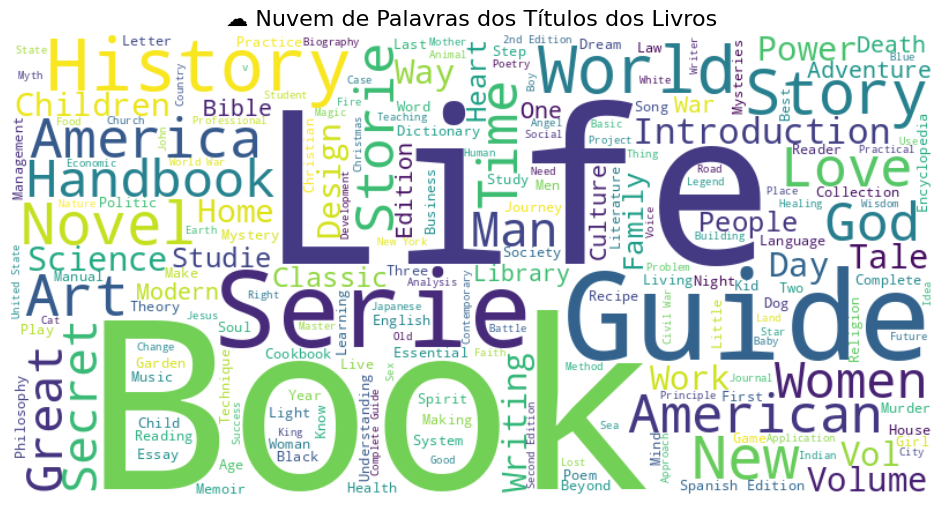

In [ ]:
# A nuvem de palavras (WordCloud) é uma ferramenta visual importante para analisar grandes volumes de texto rapidamente.
# No nosso projeto, ela ajuda a identificar quais são os temas mais recorrentes nos títulos dos livros, apenas olhando para o tamanho das palavras.

# O tamanho de cada palavra é proporcional à sua frequência nos títulos: quanto mais uma palavra aparece, maior ela é na nuvem.
# Isso facilita encontrar padrões e tendências sem precisar ler todos os registros manualmente.

# Além disso, a WordCloud torna a análise mais acessível e visual, ideal para apresentações e relatórios.
# Ela também deixa as informações mais intuitivas para quem não é especialista em dados ou estatísticas.

# Em resumo:
# - Resume rapidamente os tópicos principais.
# - Ajuda a detectar temas e interesses comuns.
# - Enriquece apresentações, deixando os dados mais fáceis de entender.

# Portanto, a nuvem de palavras criada a partir dos títulos dos livros oferece uma visão geral rápida,
# ajudando a orientar futuras análises de forma inteligente e visualmente agradável.

from wordcloud import WordCloud

# Juntar todos os títulos dos livros em uma string única
texto_titulos = " ".join(books_data_clean['Title'])

# Criar a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_titulos)

# Mostrar a WordCloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('☁️ Nuvem de Palavras dos Títulos dos Livros', fontsize=16)
plt.show()

Título: Its Only Art If Its Well Hung!


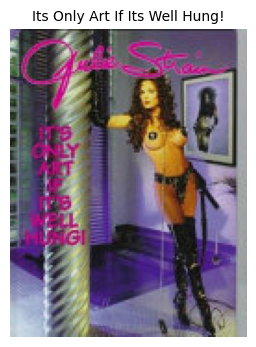

Título: Dr. Seuss: American Icon


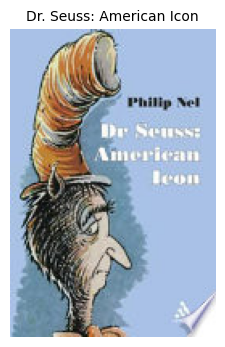

Título: Wonderful Worship in Smaller Churches


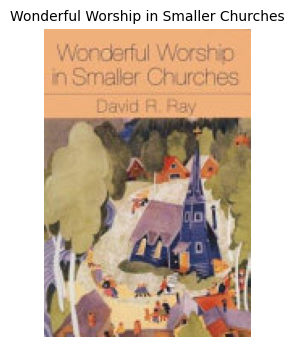

Título: Whispers of the Wicked Saints


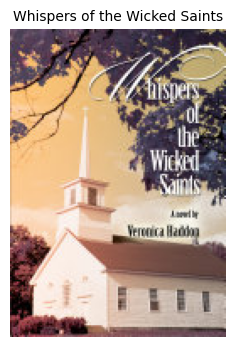

Título: The Church of Christ: A Biblical Ecclesiology for Today


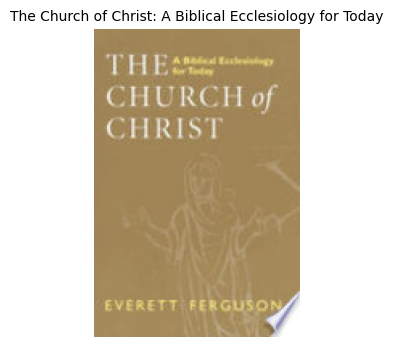

Título: Saint Hyacinth of Poland


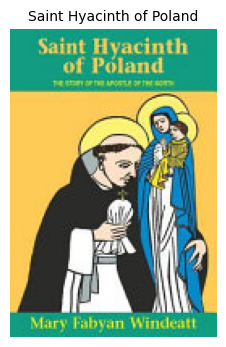

Título: Muslim Women's Choices: Religious Belief and Social Reality (Cross Cultural Perspectives on Women)


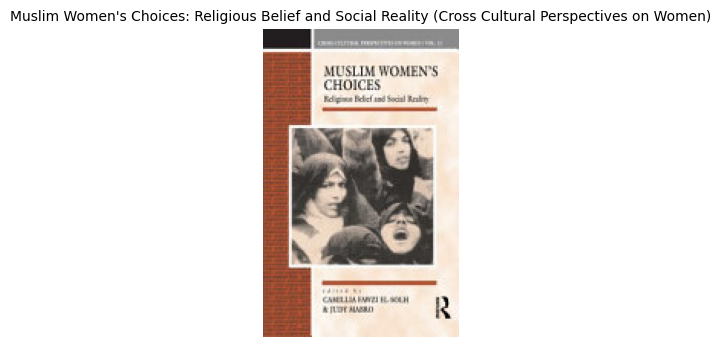

Título: Dramatica for Screenwriters


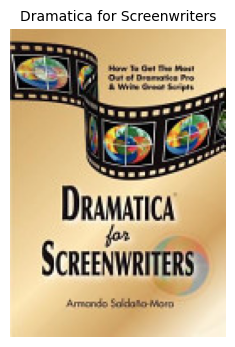

Título: Mensa Number Puzzles (Mensa Word Games for Kids)


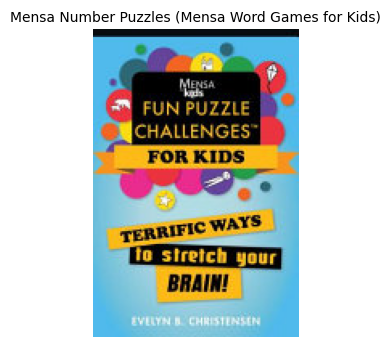

Título: Vector Quantization and Signal Compression (The Springer International Series in Engineering and Computer Science)


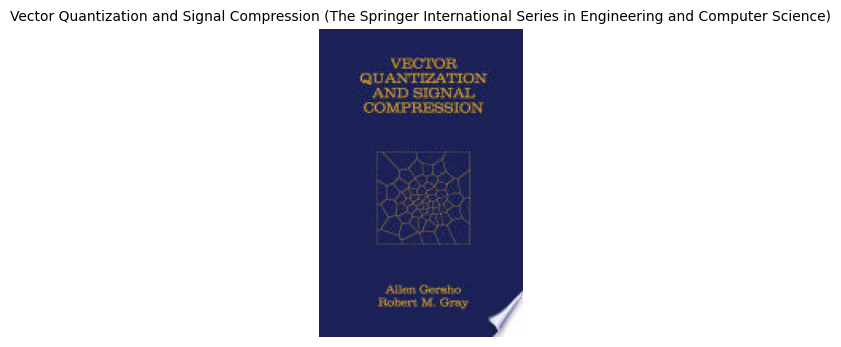

In [ ]:
# A exibição das capas dos livros tem grande importância tanto do ponto de vista analítico quanto de apresentação visual.

# 1️⃣ Identificação Rápida:
# A capa é o elemento visual mais imediato para reconhecer um livro.
# Muitas vezes, é mais fácil para o usuário identificar um livro pela imagem da capa do que pelo título ou autor.

# 2️⃣ Valor Estético e Engajamento:
# Visualizar as capas torna a análise de dados mais atrativa e envolvente.
# Ao adicionar imagens ao projeto, aumentamos o interesse visual, deixando as apresentações e dashboards mais dinâmicos.

# 3️⃣ Análise de Design e Marketing:
# Permite observar padrões no design gráfico usado em determinados gêneros literários.
# Por exemplo, livros de ficção podem usar capas coloridas e abstratas, enquanto livros acadêmicos podem ter capas mais sóbrias.

# 4️⃣ Complementa a análise textual:
# A capa, junto com o título e a descrição, ajuda a construir uma visão mais completa do livro.
# Assim, ao analisar tendências ou popularidade, conseguimos também entender a estratégia de apresentação dos livros.

# 5️⃣ Melhora a experiência do usuário:
# Caso esse projeto fosse integrado a um sistema de recomendação real, mostrar a capa dos livros tornaria a experiência muito mais agradável para os leitores.

# ✅ Em resumo:
# Exibir as capas melhora a comunicação, facilita a identificação, enriquece visualmente os dados
# e ainda pode ser uma fonte complementar para análises relacionadas ao estilo e marketing editorial.

# A exibição das 10 capas únicas no código serve como um exemplo claro de como enriquecer a análise de dados em projetos de recomendação de livros.

import requests
from PIL import Image
from io import BytesIO

# Função para exibir a imagem de uma URL
def mostrar_capa(url, titulo):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.figure(figsize=(4,4))
        plt.imshow(img)
        plt.axis('off')
        plt.title(titulo, fontsize=10)
        plt.show()
    except:
        print(f"❌ Erro ao carregar imagem do livro: {titulo}")

# Filtrar apenas livros com links de imagem válidos (não nulos)
livros_com_imagem = books_data_clean.dropna(subset=['image'])

# Remover duplicatas (mesmo título)
livros_com_imagem = livros_com_imagem.drop_duplicates(subset='Title')

# Mostrar 10 capas únicas
for idx, row in livros_com_imagem.head(10).iterrows():
    print(f"Título: {row['Title']}")
    mostrar_capa(row['image'], row['Title'])


<ipython-input-6-d49ce133d27a>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_top10.values, y=vendas_top10.index, palette='flare')
<ipython-input-6-d49ce133d27a>:31: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


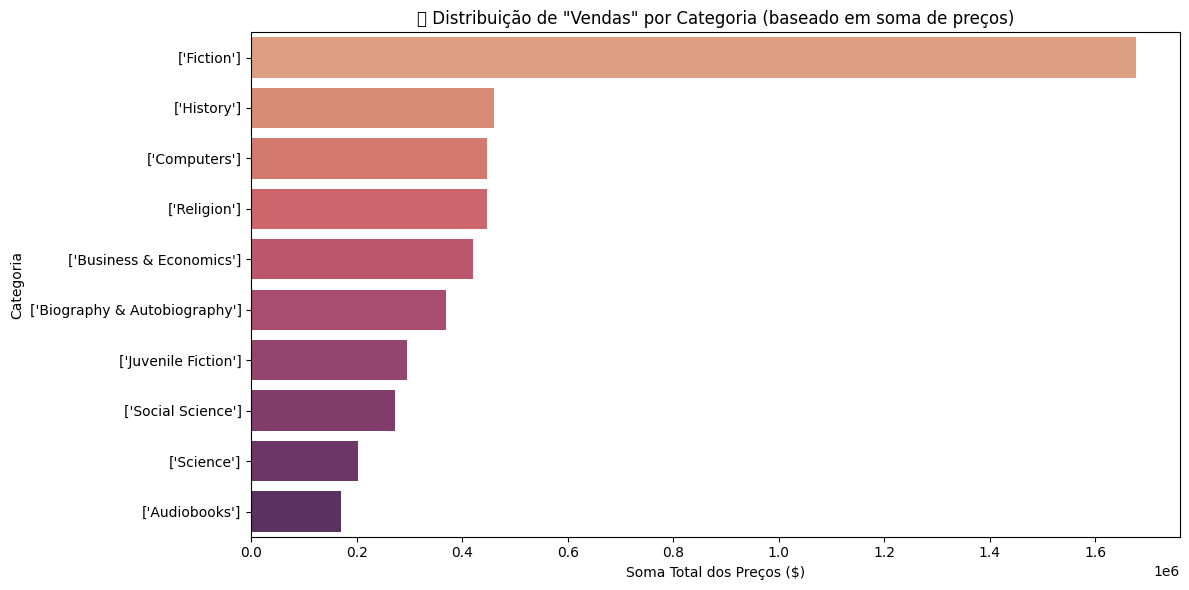

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leitura dos arquivos
books_data = pd.read_csv('/content/amazon_books_reviews/books_data.csv')
books_rating = pd.read_csv('/content/amazon_books_reviews/Books_rating.csv')

# Limpeza
books_data_clean = books_data.drop_duplicates().dropna(subset=['Title', 'categories'])
books_rating_clean = books_rating.drop_duplicates().dropna(subset=['Title', 'Price'])

# Juntar os dados pelos títulos
dados_combinados = pd.merge(books_rating_clean, books_data_clean[['Title', 'categories']], on='Title', how='inner')

# Manter apenas a primeira categoria
dados_combinados['Categoria'] = dados_combinados['categories'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Agrupar: soma de preços por categoria (como proxy de vendas totais)
vendas_categoria = dados_combinados.groupby('Categoria')['Price'].sum().sort_values(ascending=False)

# Selecionar as 10 principais categorias
vendas_top10 = vendas_categoria.head(10)

# Plotar gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=vendas_top10.values, y=vendas_top10.index, palette='flare')
plt.title('💰 Distribuição de "Vendas" por Categoria (baseado em soma de preços)')
plt.xlabel('Soma Total dos Preços ($)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()


<ipython-input-1-5f36baa0b468>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_filtrados, x='Categoria', y='Price', palette='Spectral')
<ipython-input-1-5f36baa0b468>:31: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


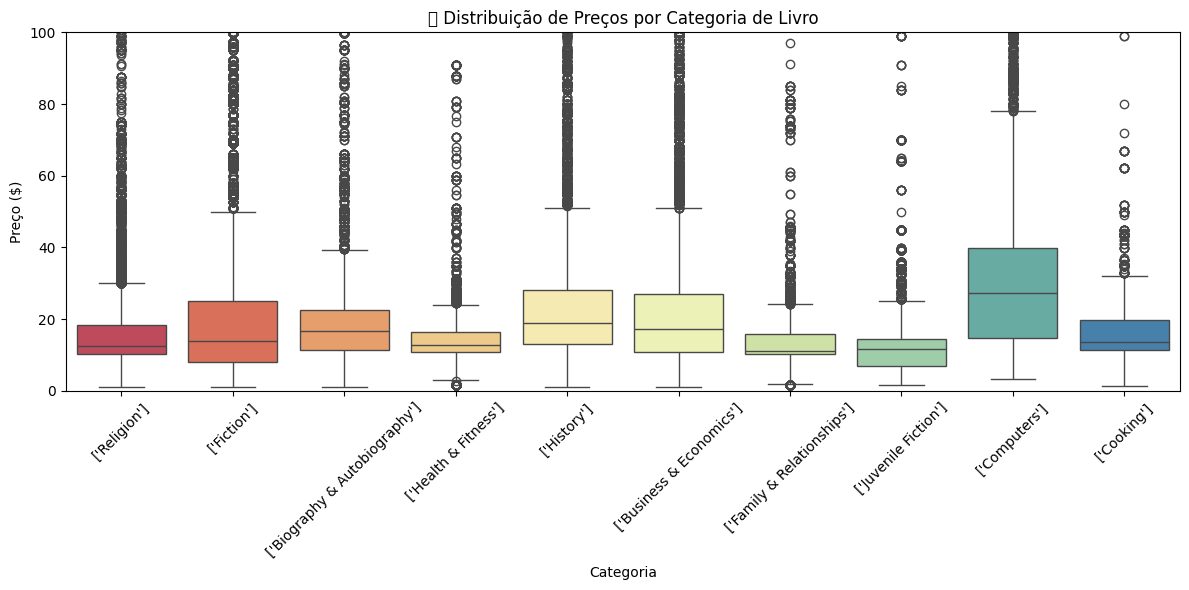

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leitura dos arquivos (ajuste se necessário)
books_data = pd.read_csv('/content/amazon_books_reviews/books_data.csv')
books_rating = pd.read_csv('/content/amazon_books_reviews/Books_rating.csv')

# Limpeza dos dados
books_data_clean = books_data.drop_duplicates().dropna(subset=['Title', 'categories'])
books_rating_clean = books_rating.drop_duplicates().dropna(subset=['Title', 'Price'])

# Junção dos dados pelo título
dados_combinados = pd.merge(books_rating_clean, books_data_clean[['Title', 'categories']], on='Title', how='inner')

# Manter apenas a primeira categoria
dados_combinados['Categoria'] = dados_combinados['categories'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Filtrar as 10 categorias com mais registros
top_categorias = dados_combinados['Categoria'].value_counts().nlargest(10).index
dados_filtrados = dados_combinados[dados_combinados['Categoria'].isin(top_categorias)]

# Plotar boxplot de preços por categoria
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados_filtrados, x='Categoria', y='Price', palette='Spectral')
plt.title('💵 Distribuição de Preços por Categoria de Livro')
plt.xlabel('Categoria')
plt.ylabel('Preço ($)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Limita para evitar distorções com outliers
plt.tight_layout()
plt.show()


<ipython-input-4-ab1f3bf4b0fd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avaliacoes_por_nota.index, y=avaliacoes_por_nota.values, palette='Blues')
<ipython-input-4-ab1f3bf4b0fd>:14: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


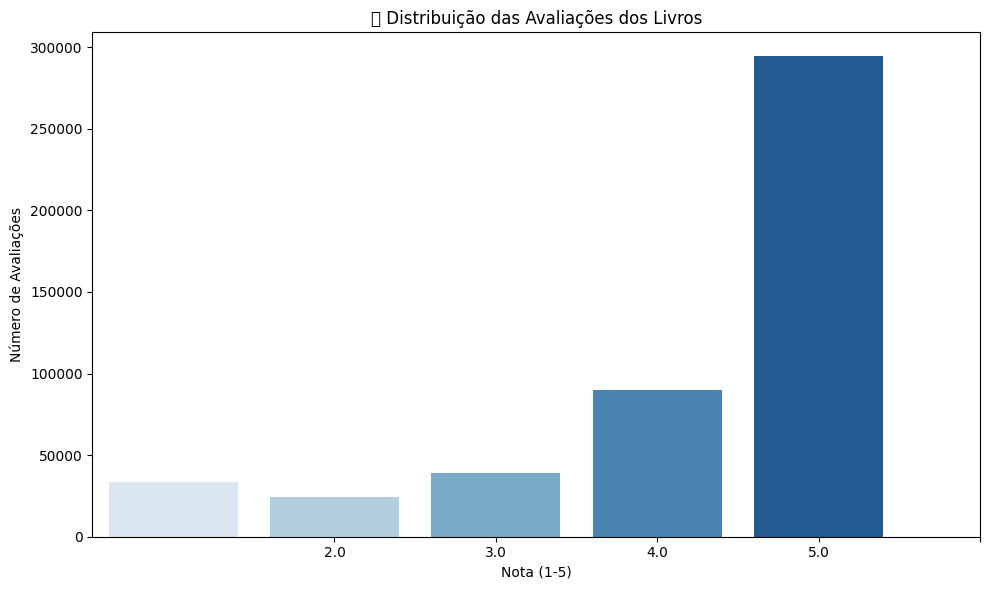

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar as avaliações por nota
avaliacoes_por_nota = books_rating_clean['review/score'].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(x=avaliacoes_por_nota.index, y=avaliacoes_por_nota.values, palette='Blues')
plt.title('📚 Distribuição das Avaliações dos Livros')
plt.xlabel('Nota (1-5)')
plt.ylabel('Número de Avaliações')
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Leitura das avaliações
books_rating = pd.read_csv('/content/amazon_books_reviews/Books_rating.csv')

# Filtragem e limpeza
books_rating_clean = books_rating[['Title', 'User_id', 'review/score']].dropna()

# Agrupar para obter uma média por livro por usuário
books_rating_clean = books_rating_clean.groupby(['User_id', 'Title'])['review/score'].mean().reset_index()

# Selecionar os 30 livros mais avaliados para visualização (para gráfico não ficar ilegível)
top_30_books = books_rating_clean['Title'].value_counts().nlargest(30).index
filtered_data = books_rating_clean[books_rating_clean['Title'].isin(top_30_books)]

# Criar uma matriz de usuários x livros
pivot_table = filtered_data.pivot(index='User_id', columns='Title', values='review/score')

# Preencher NaNs com a média da linha (usuário)
pivot_table = pivot_table.apply(lambda row: row.fillna(row.mean()), axis=1)

# Calcular similaridade de cosseno entre os livros
similarity_matrix = cosine_similarity(pivot_table.T)  # Transposta: livros x usuários
similarity_df = pd.DataFrame(similarity_matrix, index=pivot_table.columns, columns=pivot_table.columns)


<ipython-input-8-45936099324d>:40: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


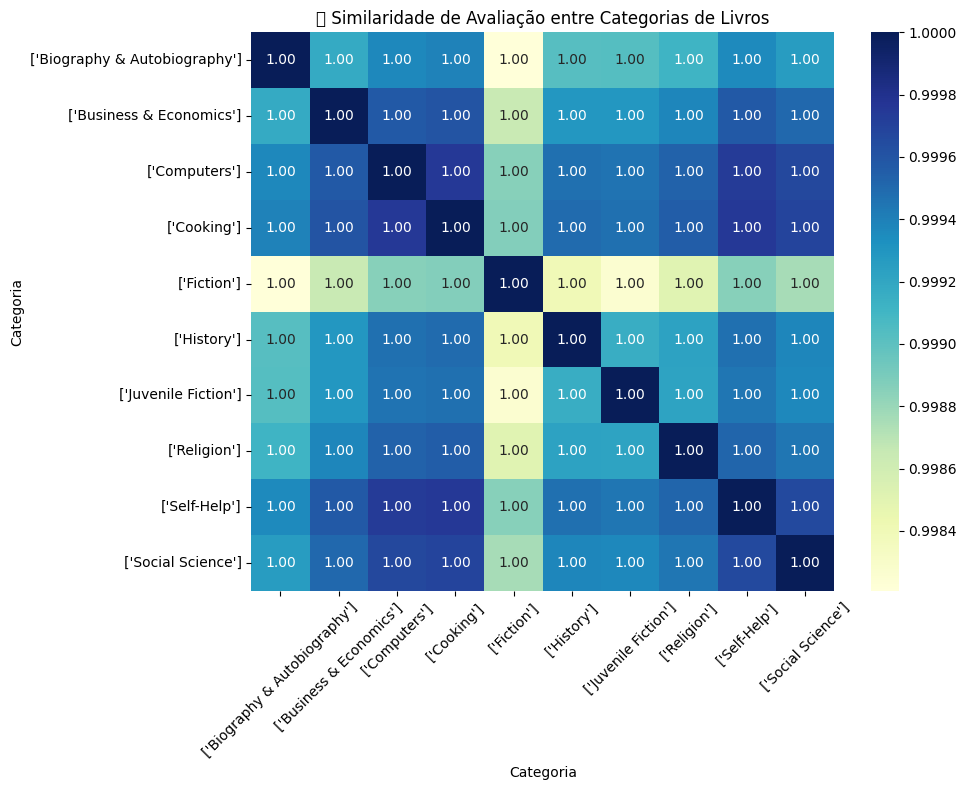

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Leitura dos dados
books_data = pd.read_csv('/content/amazon_books_reviews/books_data.csv')
books_rating = pd.read_csv('/content/amazon_books_reviews/Books_rating.csv')

# Limpeza
books_data_clean = books_data.drop_duplicates().dropna(subset=['Title', 'categories'])
books_rating_clean = books_rating.drop_duplicates().dropna(subset=['Title', 'User_id', 'review/score'])

# Juntar os dados
dados = pd.merge(books_rating_clean, books_data_clean[['Title', 'categories']], on='Title', how='inner')
dados['Categoria'] = dados['categories'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Filtrar as 10 categorias mais comuns
top_categorias = dados['Categoria'].value_counts().nlargest(10).index
dados = dados[dados['Categoria'].isin(top_categorias)]

# Criar uma tabela User x Categoria (média das avaliações)
tabela_categoria = dados.pivot_table(index='User_id', columns='Categoria', values='review/score')

# Preencher os NaNs com a média de cada usuário (linha)
tabela_categoria = tabela_categoria.apply(lambda row: row.fillna(row.mean()), axis=1)

# Calcular a matriz de similaridade entre categorias
matriz_similaridade = cosine_similarity(tabela_categoria.T)  # Transposta: categorias x usuários
similaridade_df = pd.DataFrame(matriz_similaridade, index=tabela_categoria.columns, columns=tabela_categoria.columns)

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similaridade_df, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title("🔗 Similaridade de Avaliação entre Categorias de Livros")
plt.xlabel("Categoria")
plt.ylabel("Categoria")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Leitura da base de avaliações
books_rating = pd.read_csv('/content/amazon_books_reviews/Books_rating.csv')

# 🔍 Selecionar apenas as colunas necessárias
avaliacoes = books_rating[['User_id', 'Title', 'review/score']].dropna()

# 🔢 Selecionar 5000 avaliações aleatórias
avaliacoes_sample = avaliacoes.sample(n=5000, random_state=42)

# ✂️ Dividir em treino (80%) e teste (20%)
treino, teste = train_test_split(avaliacoes_sample, test_size=0.2, random_state=42)

# 📌 Exibir formatos para conferência
print(f'Treino: {treino.shape}')
print(f'Teste: {teste.shape}')


Treino: (4000, 3)
Teste: (1000, 3)


In [ ]:
# Cálculo das médias
media_livro = treino.groupby('Title')['review/score'].mean()
media_usuario = treino.groupby('User_id')['review/score'].mean()
media_geral = treino['review/score'].mean()

# Previsão ajustada
def prever_ajustada(row):
    nota_base = media_livro.get(row['Title'], media_geral)
    ajuste_usuario = media_usuario.get(row['User_id'], media_geral) - media_geral
    return nota_base + ajuste_usuario

y_pred_ajustada = teste.apply(prever_ajustada, axis=1)
y_pred = (y_pred_ajustada >= 4).astype(int)
y_true = (teste['review/score'] >= 4).astype(int)


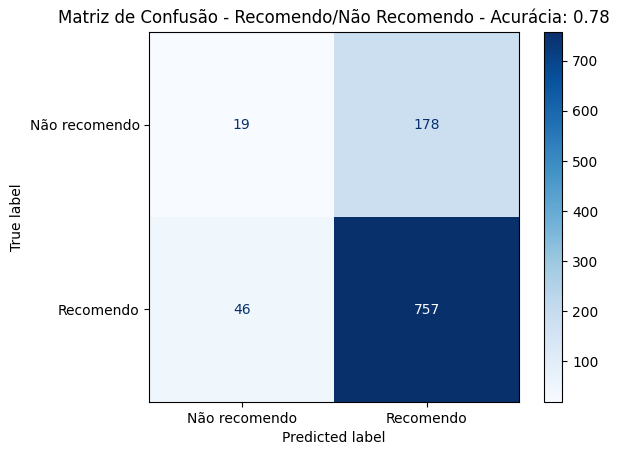


🔎 Acurácia final (recomendo/não recomendo): 77.60%


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# ✅ ETAPA 1: Calcular média de avaliação por livro no conjunto de treino
media_por_titulo = treino.groupby('Title')['review/score'].mean()

# ✅ ETAPA 2: Gerar previsões com base na média do livro
y_pred_continuo = teste['Title'].map(media_por_titulo).fillna(treino['review/score'].mean())

# ✅ ETAPA 3: Converter para binário: Recomendo (1) ou Não Recomendo (0)
y_pred = (y_pred_continuo >= 4).astype(int)
y_true = (teste['review/score'] >= 4).astype(int)

# ✅ ETAPA 4: Calcular e exibir a matriz de confusão + acurácia
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
acc = accuracy_score(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não recomendo', 'Recomendo'])
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Matriz de Confusão - Recomendo/Não Recomendo - Acurácia: {acc:.2f}')
plt.show()

print(f'\n🔎 Acurácia final (recomendo/não recomendo): {acc:.2%}')


✅ Acurácia na amostra de 5.000: 77.60%


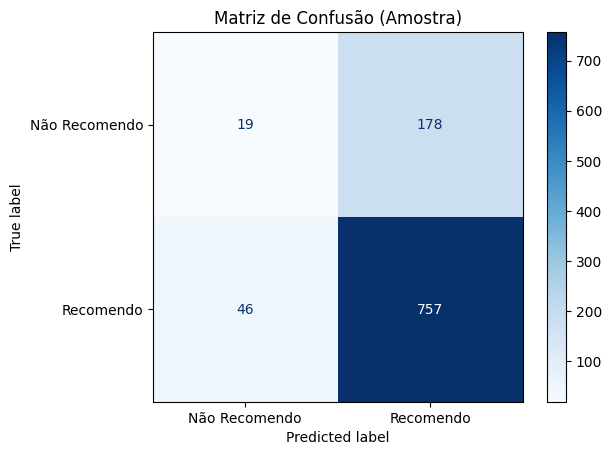

📊 Acurácia final no conjunto completo: 73.79%


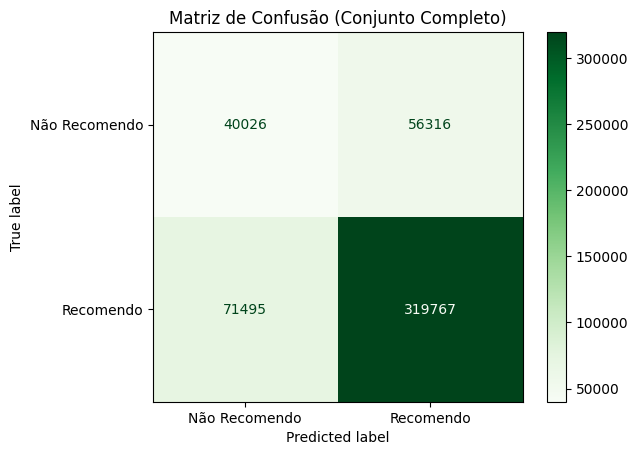

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# 🔹 1. Carregamento dos dados
avaliacoes = pd.read_csv('/content/amazon_books_reviews/Books_rating.csv')[['User_id', 'Title', 'review/score']].dropna()

# 🔹 2. Fase de Desenvolvimento com amostra (5.000 registros)
amostra = avaliacoes.sample(n=5000, random_state=42)
treino_amostra, teste_amostra = train_test_split(amostra, test_size=0.2, random_state=42)

# 🔹 3. Previsão baseada na média do livro no treino (Amostra)
media_por_titulo = treino_amostra.groupby('Title')['review/score'].mean()
media_geral = treino_amostra['review/score'].mean()
y_pred_amostra = teste_amostra['Title'].map(media_por_titulo).fillna(media_geral)
y_true_amostra = (teste_amostra['review/score'] >= 4).astype(int)
y_pred_amostra_bin = (y_pred_amostra >= 4).astype(int)

# 🔹 4. Avaliação da amostra
acc_amostra = accuracy_score(y_true_amostra, y_pred_amostra_bin)
print(f'✅ Acurácia na amostra de 5.000: {acc_amostra:.2%}')

# Matriz de confusão da amostra
cm = confusion_matrix(y_true_amostra, y_pred_amostra_bin, labels=[0, 1])
disp = ConfusionMatrixDisplay(cm, display_labels=['Não Recomendo', 'Recomendo'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão (Amostra)')
plt.show()

# 🔹 5. Aplicação no conjunto completo
treino_completo, teste_completo = train_test_split(avaliacoes, test_size=0.2, random_state=42)

# Previsão com base na média do livro (completo)
media_titulo_completo = treino_completo.groupby('Title')['review/score'].mean()
media_geral_completo = treino_completo['review/score'].mean()
y_pred_completo = teste_completo['Title'].map(media_titulo_completo).fillna(media_geral_completo)
y_true_completo = (teste_completo['review/score'] >= 4).astype(int)
y_pred_completo_bin = (y_pred_completo >= 4).astype(int)

# Avaliação final
acc_final = accuracy_score(y_true_completo, y_pred_completo_bin)
print(f'📊 Acurácia final no conjunto completo: {acc_final:.2%}')

# Matriz de confusão do conjunto completo
cm_full = confusion_matrix(y_true_completo, y_pred_completo_bin, labels=[0, 1])
disp_full = ConfusionMatrixDisplay(cm_full, display_labels=['Não Recomendo', 'Recomendo'])
disp_full.plot(cmap='Greens', values_format='d')
plt.title('Matriz de Confusão (Conjunto Completo)')
plt.show()
